In [1]:
%matplotlib inline
import pandas as pd
import boto3

s3 = boto3.resource('s3')

In [2]:
bucket = s3.Bucket('aws-cdk-twitter-sentiment-raw')
first_obj = next(iter(bucket.objects.all()))
json_file = f's3://{first_obj.bucket_name}/{first_obj.key}'
json_file

&#39;s3://aws-cdk-twitter-sentiment-raw/data/year=2020/month=10/day=03/hour=18/aws-cdk-twitter-sentiment-stream-raw-1-2020-10-03-18-23-13-0bf4ae26-15f5-4235-935c-88e03ad20dd1.gz&#39;

In [3]:
tweets_raw = pd.read_json(json_file, lines=True, compression='gzip', encoding='utf-8')
tweets_raw.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,extended_entities,retweeted_status
0,2020-10-03 18:15:08+00:00,1312456166128058368,1312456166128058368,From Infinite Matrices to New Integration Form...,False,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,NaN,...,False,1,2,False,False,0.0,0.0,en,NaN,NaN
1,2020-10-03 18:04:54+00:00,1312453590510825472,1312453590510825472,Fueled by cooped-up folks itching to get outsi...,False,"[0, 231]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,NaN,...,False,5,29,False,False,0.0,0.0,en,NaN,NaN
2,2020-10-03 18:00:59+00:00,1312452602353774595,1312452602353774592,How to Convert an RGB Image to Grayscale #KDN ...,False,"[0, 69]","{'hashtags': [{'text': 'KDN', 'indices': [41, ...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,NaN,...,False,0,2,False,False,0.0,0.0,en,NaN,NaN
3,2020-10-03 18:00:45+00:00,1312452544967307265,1312452544967307264,Airbnb nears IPO as Asana and Palantir land th...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,NaN,...,False,11,19,False,False,0.0,0.0,en,NaN,NaN
4,2020-10-03 18:00:19+00:00,1312452436854935555,1312452436854935552,Say goodbye to foggy glasses and hello to clea...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://trueanthem.com/"" rel=""nofollo...",NaN,NaN,...,False,4,14,False,False,0.0,0.0,en,"{'media': [{'id': 1312452435462574082, 'id_str...",NaN


In [4]:
tweets_raw.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 40 entries, 0 to 39
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     40 non-null     datetime64[ns, UTC]
 1   id                             40 non-null     int64              
 2   id_str                         40 non-null     int64              
 3   full_text                      40 non-null     object             
 4   truncated                      40 non-null     bool               
 5   display_text_range             40 non-null     object             
 6   entities                       40 non-null     object             
 7   source                         40 non-null     object             
 8   in_reply_to_status_id          0 non-null      float64            
 9   in_reply_to_status_id_str      0 non-null      float64            
 10  in_reply_to_us

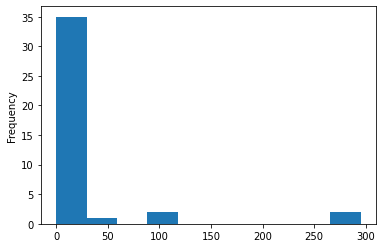

In [5]:
tweets_raw.favorite_count.plot.hist();

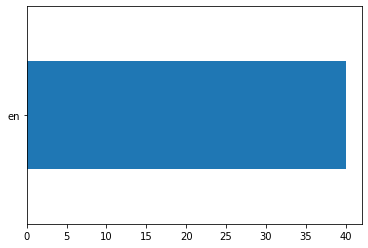

In [6]:
tweets_raw.lang.value_counts().plot.barh();

In [7]:
d = tweets_raw.user[0]
type(d), d

(dict,
 {&#39;id&#39;: 393033324,
  &#39;id_str&#39;: &#39;393033324&#39;,
  &#39;name&#39;: &#39;Data Science Central&#39;,
  &#39;screen_name&#39;: &#39;DataScienceCtrl&#39;,
  &#39;location&#39;: &#39;Los Angeles, CA&#39;,
  &#39;description&#39;: &#39;Co-founded by Vincent Granville and part the DSC Community, our focus is on data science, ML, AI, deep learning, dataviz, Hadoop, IoT, and BI.&#39;,
  &#39;url&#39;: &#39;http://t.co/gbSIHZcKZR&#39;,
  &#39;entities&#39;: {&#39;url&#39;: {&#39;urls&#39;: [{&#39;url&#39;: &#39;http://t.co/gbSIHZcKZR&#39;,
      &#39;expanded_url&#39;: &#39;http://www.DataScienceCentral.com&#39;,
      &#39;display_url&#39;: &#39;DataScienceCentral.com&#39;,
      &#39;indices&#39;: [0, 22]}]},
   &#39;description&#39;: {&#39;urls&#39;: []}},
  &#39;protected&#39;: False,
  &#39;followers_count&#39;: 174990,
  &#39;friends_count&#39;: 1088,
  &#39;listed_count&#39;: 4098,
  &#39;created_at&#39;: &#39;Mon Oct 17 22:45:52 +0000 2011&#39;,
  &#39;favourite

In [8]:
for d in tweets_raw.user:
    print(d['id'], d['name'])

393033324 Data Science Central
1344951 WIRED
20167623 KDnuggets
816653 TechCrunch
19722699 Popular Science
393033324 Data Science Central
19722699 Popular Science
1562518867 Databricks
66780587 Amazon Web Services
125485258 Java
393033324 Data Science Central
15492359 TED Talks
66780587 Amazon Web Services
20167623 KDnuggets
19722699 Popular Science
2581958070 Ververica (formerly data Artisans)
19722699 Popular Science
15492359 TED Talks
20167623 KDnuggets
23009949 ThoughtWorks
393033324 Data Science Central
1344951 WIRED
20167623 KDnuggets
816653 TechCrunch
19722699 Popular Science
393033324 Data Science Central
19722699 Popular Science
1562518867 Databricks
66780587 Amazon Web Services
125485258 Java
393033324 Data Science Central
15492359 TED Talks
66780587 Amazon Web Services
20167623 KDnuggets
19722699 Popular Science
2581958070 Ververica (formerly data Artisans)
19722699 Popular Science
15492359 TED Talks
20167623 KDnuggets
23009949 ThoughtWorks


In [9]:
cols = ['id', 'full_text', 'retweeted', 'retweet_count', 'favorited', 'favorite_count', 'lang']
tweets = tweets_raw[cols]\
    .assign(user_id=[d['id'] for d in tweets_raw.user])\
    .assign(user_name=[d['name'] for d in tweets_raw.user])
tweets.head()

,id,full_text,retweeted,retweet_count,favorited,favorite_count,lang,user_id,user_name
0,1312456166128058368,From Infinite Matrices to New Integration Form...,False,1,False,2,en,393033324,Data Science Central
1,1312453590510825472,Fueled by cooped-up folks itching to get outsi...,False,5,False,29,en,1344951,WIRED
2,1312452602353774595,How to Convert an RGB Image to Grayscale #KDN ...,False,0,False,2,en,20167623,KDnuggets
3,1312452544967307265,Airbnb nears IPO as Asana and Palantir land th...,False,11,False,19,en,816653,TechCrunch
4,1312452436854935555,Say goodbye to foggy glasses and hello to clea...,False,4,False,14,en,19722699,Popular Science
